<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyLogic/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# Create universe

Felhőtakaró = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'sky')

Hőmérséklet = ctrl.Antecedent(np.arange(-30, 50.1, 0.1), 'temperature')

Sebesség    = ctrl.Consequent(np.arange(0, 130, 1), 'speed')

No handles with labels found to put in legend.


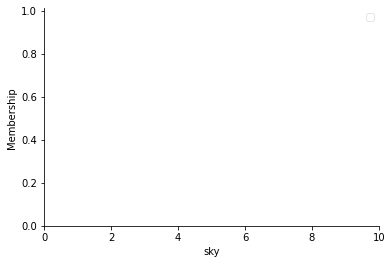

In [ ]:
Felhőtakaró.view()

In [ ]:
Felhőtakaró.universe

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Felhőtakaró['felhős'] = fuzzy.trimf(Felhőtakaró.universe, [0, 3.5, 7])

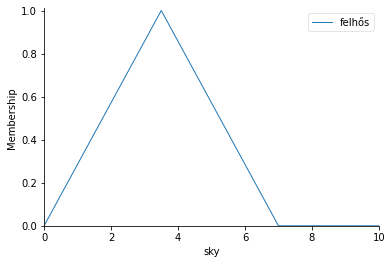

In [ ]:
Felhőtakaró.view()

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Felhőtakaró['napos'] = fuzzy.trimf(Felhőtakaró.universe, [3, 6.5, 10])

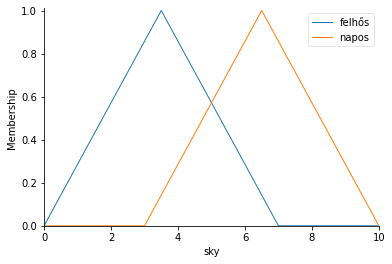

In [ ]:
Felhőtakaró.view()

In [ ]:
# Eddig megvagyunk a Felhőtakaró változó tagsági fűggvényeivel {felhős, napos}

# Most készítsük el a Hőmérséklet tagsági függvényeit is {hideg, meleg}

# Itt direkt más tagsági függvényt használnok (trampf)

Hőmérséklet['hideg'] = fuzzy.trapmf(Hőmérséklet.universe, [-30, -30, 0, 30])

Hőmérséklet['meleg'] = fuzzy.trapmf(Hőmérséklet.universe, [0, 30, 50, 50])

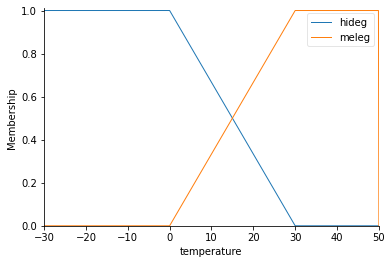

In [ ]:
Hőmérséklet.view()

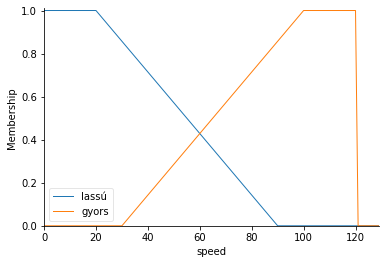

In [ ]:
# Most készítsük el a Sebesség változó tagsági függvyényeit is {Lassú, Gyors}

Sebesség['lassú'] = fuzzy.trapmf(Sebesség.universe, [0, 0, 20, 90])
Sebesség['gyors'] = fuzzy.trapmf(Sebesség.universe, [30, 100, 120, 120])

Sebesség.view()

In [ ]:
# Direkt csak az egyik szabályt írom meg, szóval a sebesség soha sem lehet lassú (mert ehhez most nem rendelek semmilyen szabályt)

# Más szavakkal nincs olyan szabály aminek a kimenete Sebesség{'lassú'}

rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])

# Ebben az esetben, ahogy már mondtan az AND logikai kapcsoló a max(Felhőtakaró['napos'], Hőmérséklet['meleg']) tagságii függvény értéket fogja hozzárendelni a Sebesség['gyors'] értékhez.

# Helyesebben egyébként ez sem igaz, mert a Felhőtakaró és a Hőmérséklet tagsági függvények középértékét fogja venni olyan arányban amennyire az adott bemenet alapján része a tagsági függvénynek.

In [ ]:
def setRules(rule_type = 'and'):

  if( rule_type == 'and'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
  elif( rule_type == 'or'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] | Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
  
  return rule1

In [ ]:
def fuzzyDemo(Felhőtakaró_ = 8.0, Hőmérséklet_ = 30, Type = ['and','or']):

  rule1 = setRules(Type)

  # csak egy szabályunk van
  print(rule1)

  # csak egy szabályunk van
  system = ctrl.ControlSystem([rule1])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['sky'] = Felhőtakaró_
  simulation.input['temperature'] = Hőmérséklet_

  simulation.compute()

  print('----------------------------')
  print('y  :', simulation.output['speed'])
  print('----------------------------')
  print(simulation.input)

  Sebesség.view(sim = simulation)
  Felhőtakaró.view(sim = simulation)
  Hőmérséklet.view(sim = simulation)

In [ ]:
Hőmérséklet.defuzzify_method = 'lom'
Felhőtakaró.defuzzify_method = 'lom'
Sebesség.defuzzify_method = 'som'


print(Hőmérséklet.defuzzify_method)
print(Felhőtakaró.defuzzify_method)
print(Sebesség.defuzzify_method)

lom
lom
som


In [ ]:
interact(fuzzyDemo, Felhőtakaró_=(0.0,10.0), Hőmérséklet_=(-30,50))

interactive(children=(FloatSlider(value=8.0, description='Felhőtakaró_', max=10.0), IntSlider(value=30, descri…

<function __main__.fuzzyDemo>

In [ ]:
# https://buildmedia.readthedocs.org/media/pdf/scikit-fuzzy/stable/scikit-fuzzy.pdf


In [ ]:
def setTwoRules(rule_type = 'and'):

  if( rule_type == 'and'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
    rule2 = ctrl.Rule(antecedent= Felhőtakaró['felhős'] & Hőmérséklet['hideg'], consequent = Sebesség['lassú'])
  elif( rule_type == 'or'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] | Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
    rule2 = ctrl.Rule(antecedent= Felhőtakaró['felhős'] | Hőmérséklet['hideg'], consequent = Sebesség['lassú'])
  
  return rule1, rule2

In [ ]:
def fuzzyDemoSecond(Felhőtakaró_ = 8.0, Hőmérséklet_ = 30, Type = ['and','or']):

  rule1, rule2 = setTwoRules(Type)

  # két szabályunk van
  print(rule1)
  print(rule2)

  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['sky'] = Felhőtakaró_
  simulation.input['temperature'] = Hőmérséklet_

  simulation.compute()

  print('----------------------------')
  print('y  :', simulation.output['speed'])
  print('----------------------------')
  print(simulation.input)

  Sebesség['gyors'].view(sim = simulation)
  Felhőtakaró.view(sim = simulation)
  Hőmérséklet.view(sim = simulation)

In [ ]:
interact(fuzzyDemoSecond, Felhőtakaró_=(0.0,10.0), Hőmérséklet_=(-30,50))

interactive(children=(FloatSlider(value=8.0, description='Felhőtakaró_', max=10.0), IntSlider(value=30, descri…

<function __main__.fuzzyDemoSecond>

In [ ]:
# https://buildmedia.readthedocs.org/media/pdf/scikit-fuzzy/stable/scikit-fuzzy.pdf

In [ ]:
Hőmérséklet['hideg'] = fuzzy.trapmf(Hőmérséklet.universe, [-30, -30, 0, 30])

Hőmérséklet['meleg'] = fuzzy.trapmf(Hőmérséklet.universe, [0, 30, 50, 50])

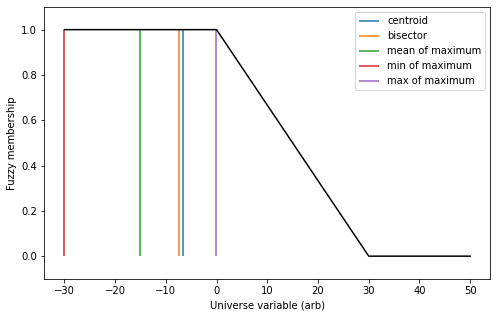

[]

In [ ]:

# Generate trapezoidal membership function
x = Hőmérséklet.universe
mfx = fuzzy.trapmf(Hőmérséklet.universe, [-30, -30, 0, 30])


# Defuzzify this membership function five ways
defuzz_centroid = fuzzy.defuzz(x, Hőmérséklet.terms.get('hideg').mf, 'centroid')
defuzz_bisector = fuzzy.defuzz(x, Hőmérséklet.terms.get('hideg').mf, 'bisector')
defuzz_mom = fuzzy.defuzz(x, Hőmérséklet.terms.get('hideg').mf, 'mom')
defuzz_som = fuzzy.defuzz(x, Hőmérséklet.terms.get('hideg').mf, 'som')
defuzz_lom = fuzzy.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid',
          'bisector',
          'mean of maximum',
          'min of maximum',
          'max of maximum']

xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

# fuzzy.interp_membership(Hőmérséklet.universe, Hőmérséklet.terms.get('hideg').mf, 'centroid')
ymax = [fuzzy.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)

plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=1)

plt.show()

fuzzy.interp_membership(Hőmérséklet.universe, Hőmérséklet.terms.get('hideg').mf, defuzz_centroid)
fuzzy.interp_universe(x, mfx, 10)


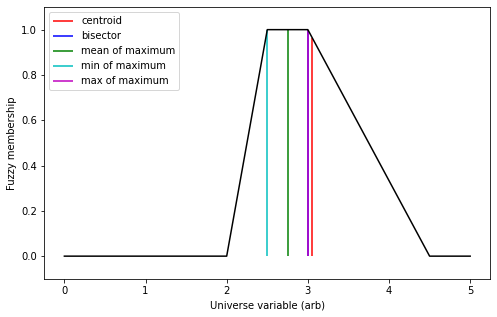

In [ ]:

# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzzy.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzzy.defuzz(x, mfx, 'centroid') # Same as skfuzzy.centroid
defuzz_bisector = fuzzy.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzzy.defuzz(x, mfx, 'mom')
defuzz_som = fuzzy.defuzz(x, mfx, 'som')
defuzz_lom = fuzzy.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']

ymax = [fuzzy.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)

plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()


## Nagyon fontos, hogy azért nem tudom kivinni a max vagy a min értékig mert a függvény alatti területet különböző képpen számoljuk.
## Gyárilag ez a középérték, de lehet másképpen is számolni


## Az egész program egyben

Szabály kapcsolat (and, or)or
IF sky[napos] OR temperature[meleg] THEN speed[gyors]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF sky[felhős] OR temperature[hideg] THEN speed[lassú]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Felhőtakaró?
4
Hőmérséklet?
3
----------------------------
y  : 44.407413786461035
----------------------------
sky : 4
temperature : 3



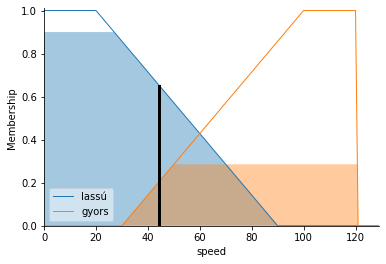

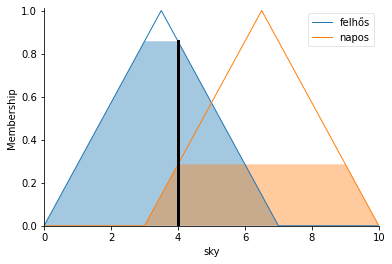

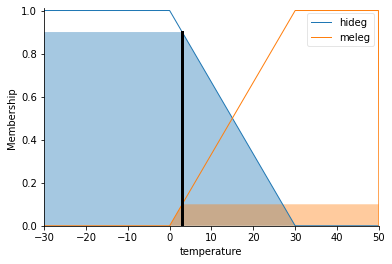

In [ ]:


# crisp set
Felhőtakaró = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'sky')
Hőmérséklet = ctrl.Antecedent(np.arange(-30, 50.1, 0.1), 'temperature')
Sebesség    = ctrl.Consequent(np.arange(0, 130, 1), 'speed')


# fuzzyfication
Felhőtakaró['felhős'] = fuzzy.trimf(Felhőtakaró.universe, [0, 3.5, 7])
Felhőtakaró['napos'] = fuzzy.trimf(Felhőtakaró.universe, [3, 6.5, 10])

Hőmérséklet['hideg'] = fuzzy.trapmf(Hőmérséklet.universe, [-30, -30, 0, 30])
Hőmérséklet['meleg'] = fuzzy.trapmf(Hőmérséklet.universe, [0, 30, 50, 50])

Sebesség['lassú'] = fuzzy.trapmf(Sebesség.universe, [0, 0, 20, 90])
Sebesség['gyors'] = fuzzy.trapmf(Sebesség.universe, [30, 100, 120, 120])


def setTwoRules(rule_type = 'and'):

  if( rule_type == 'and'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
    rule2 = ctrl.Rule(antecedent= Felhőtakaró['felhős'] & Hőmérséklet['hideg'], consequent = Sebesség['lassú'])
  elif( rule_type == 'or'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] | Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
    rule2 = ctrl.Rule(antecedent= Felhőtakaró['felhős'] | Hőmérséklet['hideg'], consequent = Sebesség['lassú'])
  
  return rule1, rule2


RuleType = str(input("Szabály kapcsolat (and, or)"))
rule1, rule2 = setTwoRules('and')
rule1, rule2 = setTwoRules(RuleType)

# két szabályunk van
print(rule1)
print(rule2)

# két szabályunk van
system = ctrl.ControlSystem([rule1, rule2])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['sky'] = int(input("Felhőtakaró?\n"))
simulation.input['temperature'] = int(input("Hőmérséklet?\n"))

# defuzification
simulation.compute()

print('----------------------------')
print('y  :', simulation.output['speed'])
print('----------------------------')
print(simulation.input)

Sebesség.view(sim = simulation)
Felhőtakaró.view(sim = simulation)
Hőmérséklet.view(sim = simulation)


## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [ ]:
# We can simulate at higher resolution with full accuracy

sky_space = np.linspace(0, 10, 11)
temperature_space = np.linspace(-30, 49, 80)
x, y = np.meshgrid(sky_space, temperature_space)
z = np.zeros_like(x)


# Loop through the system 80*10 times to collect the control surface
for i in range(80):
  for j in range(10):
    simulation.input['sky'] = x[i, j]
    simulation.input['temperature'] = y[i, j]
    simulation.compute()
    z[i, j] = simulation.output['speed']


In [ ]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

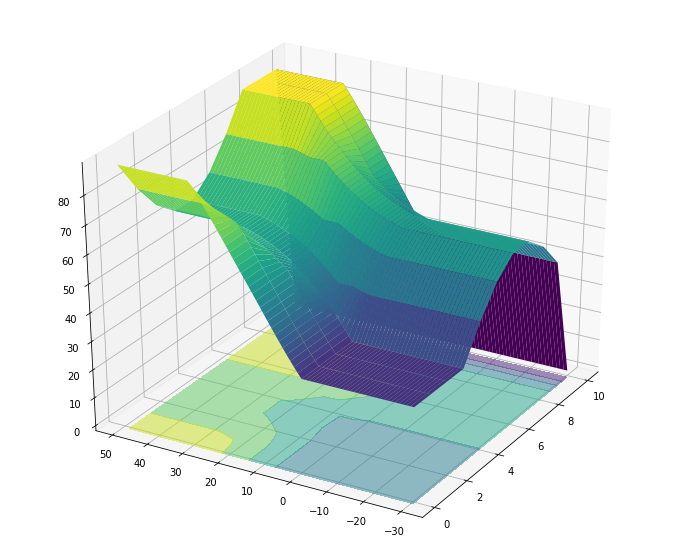

In [ ]:
# Plot the result in pretty 3D with alpha blending

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)

ax.view_init(30, 210)